In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
path = os.path.join(os.path.abspath('.'), 'result.txt')

In [3]:
impedancia = np.loadtxt(path, delimiter=" ")

In [4]:
impedancia

array([[ 1.00000e+00,  1.00972e+04, -6.26840e+00],
       [ 1.12202e+00,  1.00565e+04, -7.05793e+00],
       [ 1.25893e+00,  1.00943e+04, -7.83389e+00],
       [ 1.41254e+00,  1.00142e+04, -8.91237e+00],
       [ 1.58489e+00,  1.00553e+04, -9.99341e+00],
       [ 1.77828e+00,  1.00386e+04, -1.12287e+01],
       [ 1.99526e+00,  1.00804e+04, -1.25130e+01],
       [ 2.23872e+00,  1.00420e+04, -1.41074e+01],
       [ 2.51189e+00,  9.92380e+03, -1.57491e+01],
       [ 2.81838e+00,  1.00429e+04, -1.76649e+01],
       [ 3.16228e+00,  9.90873e+03, -2.00250e+01],
       [ 3.54813e+00,  1.00853e+04, -2.21126e+01],
       [ 3.98107e+00,  9.96454e+03, -2.48420e+01],
       [ 4.46684e+00,  9.95822e+03, -2.78879e+01],
       [ 5.01187e+00,  9.94243e+03, -3.16226e+01],
       [ 5.62341e+00,  9.96921e+03, -3.51276e+01],
       [ 6.30957e+00,  1.00051e+04, -3.93157e+01],
       [ 7.07946e+00,  9.91848e+03, -4.40915e+01],
       [ 7.94328e+00,  9.91548e+03, -4.96385e+01],
       [ 8.91251e+00,  9.99086e

In [5]:
frequency = [impedancia[i][0] for i in range(len(impedancia))]

In [6]:
z_real_txt = [impedancia[i][1] for i in range(len(impedancia))]

In [7]:
z_imag_txt = [impedancia[i][2] for i in range(len(impedancia))]

In [8]:
f = np.array(frequency)
z_exp = 1/(1/5e4+1/(1/(complex(0, 1)*2*np.pi*f*5e-8)))
# z_re_exp = z_exp.real
# z_im_exp = z_exp.imag
z_re_exp = np.array(z_real_txt)
z_im_exp = np.array(z_imag_txt)

In [9]:
C = 4e-7  # capacitor -> fara
R = 100000  # resitor -> Ohm

In [10]:
C_list = []
R_list = []

In [11]:
def gradient_descent(C, R, f, z_re_exp, z_im_exp):
    i = complex(0, 1)
    w = 2*np.pi*f
    Ro = R
    Co = C
    r = R/Ro
    c = C/Co


    W = 1
    C_old = 2 * C
    R_old = 2 * R
    delta_r = 1
    delta_c = 1
    controller = None
    global count
    count = 0

    outputfile = open("test.txt", "w")

    while (abs(R_old - R)/R_old > 0.0001 or abs(C_old - C)/C_old > 0.0001) and count < 1000:
        global z_c
        z_c = 1/(i * w * C)
        
        z_r = R
        z = 1/(1/z_r + 1/z_c)
        z_re = z.real
        z_im = z.imag

        tau = R * C
        factor1 = 1 - (w * tau)**2
        factor2 = -2 * w * tau
        factor3 = w * R**2
        denominador = (1 + (w * tau)**2)**2
        # s1 = np.sum(W*(z_re-z_re_exp)**2)
        # s2 = np.sum(W*(z_im-z_im_exp)**2)
        # s = s1+s2

        sc_1 = 2 * W * (z_re - z_re_exp) * Co*factor2*factor3/denominador
        sc_2 = 2 * W * (z_im - z_im_exp) * Co*(-factor1 * factor3)/denominador
        sc = sc_1 + sc_2
        sc_sum = np.sum(sc)

        if sc_sum == 0:
            alpha_c = 1
        else:
            ratio_c = min(0.90*delta_c*c,0.5*c) if controller == 'c' else 0.5*c 
            alpha_c = min(1, ratio_c/abs(sc_sum))
 
        # Resitor

        sr_1 = 2 * W * (z_re - z_re_exp) * Ro*factor1/denominador
        sr_2 = 2 * W * (z_im - z_im_exp) * Ro*factor2/denominador
        sr = sr_1 + sr_2
        sr_sum = np.sum(sr)

        if sr_sum == 0:
            alpha_r = 1
        else:
            ratio_r = min(0.90*delta_r*r,0.5*r) if controller == 'r' else 0.5*r 
            alpha_r = min(1, ratio_r/abs(sr_sum))

        alpha = min(alpha_c, alpha_r)
        if alpha_c < alpha_r:
            controller = 'c'
        else:
            controller = 'r'

      
        print(f'Alpha: {alpha},alpha_r:{alpha_r},alpha_c:{alpha_c}')
        
        c_old = c
        C_old = c_old*Co
        print(f'c: {c}; sc_sum: {sc_sum}')
        c -= alpha * sc_sum
        delta_c = abs(c-c_old)
        C = c*Co
        print(f'Novo c:{c}, Novo C:{C}')
        
        r_old = r
        R_old = r_old*Ro
        print(f'r: {r}; sr_sum: {sr_sum}')
        r -= alpha * sr_sum
        delta_r = abs(r-r_old)
        R = r*Ro 
        print(f'Novo r:{r}, Novo R:{R}\n')
        
        C_list.append(C)
        R_list.append(R)
        
        Co = C 
        Ro = R
        
        c = 1
        r = 1
        
        outputfile.write(" \n%s" % str(alpha)+';   '+str(C)+';   '+str(R)+';   '+str(sc_sum)+';   '+str(sr_sum))

        count += 1

    print(f'Contador:{count}, C_old:{C_old}, R_old:{R_old}\n')
    print('\u0394C: ', C-C_old)
    print('\u0394R: ', R-R_old)
    return C, R, sc_sum, sr_sum, count





In [12]:
gradient_descent(C, R, f, z_re_exp, z_im_exp)

Alpha: 3.0620515668047965e-12,alpha_r:3.0620515668047965e-12,alpha_c:7.623940915750767e-12
c: 1.0; sc_sum: -65582879710.809326
Novo c:1.2008181595740541, Novo C:4.803272638296216e-07
r: 1.0; sr_sum: 163289216099.565
Novo r:0.5, Novo R:50000.0

Alpha: 8.150253860586983e-12,alpha_r:8.150253860586983e-12,alpha_c:3.962143006136143e-11
c: 1; sc_sum: -12619433453.705572
Novo c:1.1028515862244843, Novo C:5.297296848213646e-07
r: 1; sr_sum: 55213004122.00792
Novo r:0.5499999999999999, Novo R:27499.999999999996

Alpha: 2.1685246003134553e-11,alpha_r:2.1685246003134553e-11,alpha_c:3.0247035912716413e-10
c: 1; sc_sum: -1653054538.774792
Novo c:1.0358468943299295, Novo C:5.487188488565828e-07
r: 1; sr_sum: 18676292625.016026
Novo r:0.595, Novo R:16362.499999999996

Alpha: 6.302751371778357e-11,alpha_r:6.302751371778357e-11,alpha_c:8.018278488054808e-10
c: 1; sc_sum: 623575248.4088356
Novo c:0.9606976024768418, Novo C:5.271528825303717e-07
r: 1; sr_sum: 5783188618.737381
Novo r:0.6355, Novo R:10398

(1.001376446013675e-08,
 10005.76491862301,
 63077.727307790294,
 132279.35114355874,
 111)

In [13]:
x = np.arange(count)

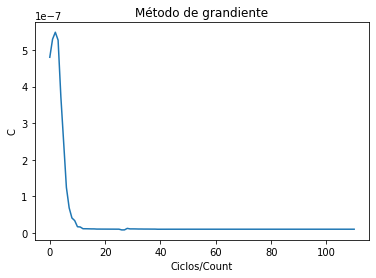

In [23]:
plt.title("Método de grandiente")
plt.xlabel("Ciclos/Count")
plt.ylabel("C")
plt.plot(x, C_list)
plt.savefig("metodo-gradiente-C.png", dpi=300)

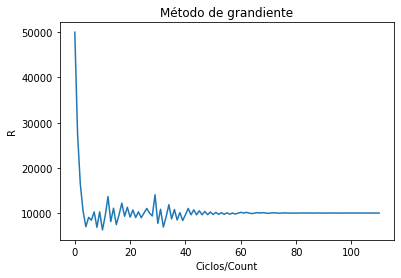

In [22]:
plt.title("Método de grandiente")
plt.xlabel("Ciclos/Count")
plt.ylabel("R")
plt.plot(x, R_list)
plt.savefig("metodo-gradiente-R.png", dpi=300)

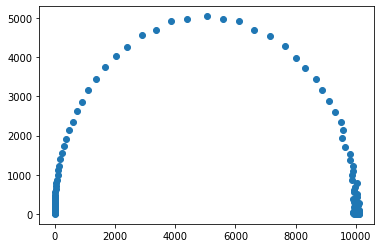

In [18]:
plt.plot(z_re_exp, -z_im_exp, 'o')